In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LoR
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC as SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('sonar_dataset.csv',header=None)

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
data.shape

(208, 61)

In [6]:
data.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [7]:
pd.set_option('display.max_columns', 100)

In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


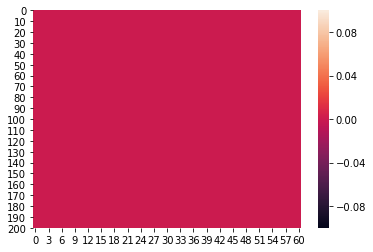

In [9]:
#checking null values
sns.heatmap(data.isnull())

In [10]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,0.556525,0.518900,0.440550,0.434900,0.424350,0.387525,0.384250,0.324525,0.271750,0.231550,0.200375,0.154425,0.120100,0.0685

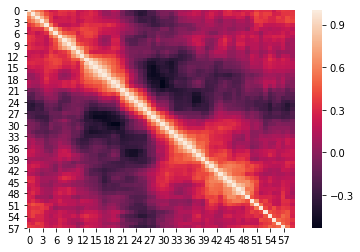

In [11]:
sns.heatmap(data.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000170B6CB3588>,
      dtype=object)

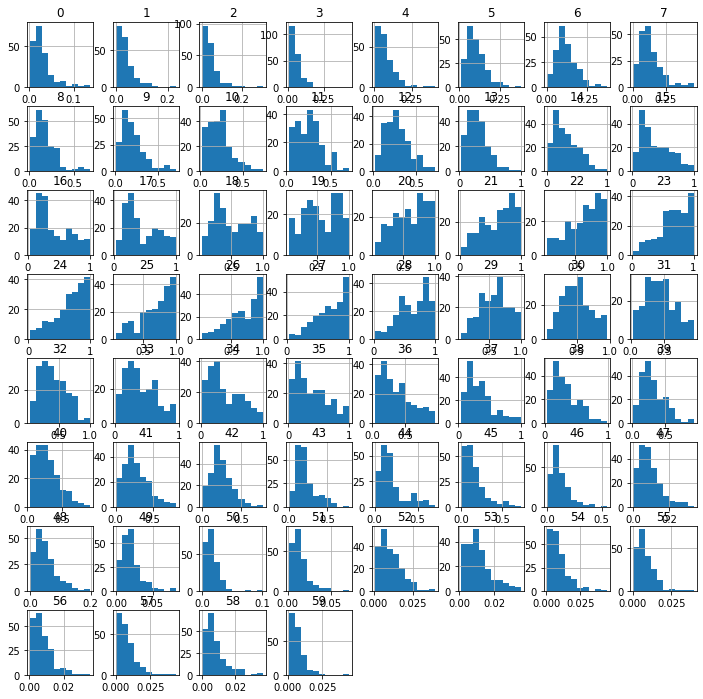

In [12]:
data.hist(figsize=(12,12))

In [13]:
#labeling Y col

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded = le.fit_transform(data.iloc[:,-1:])
data.iloc[:,-1:] = encoded


In [14]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

scalar.fit(data)
sondata = scalar.transform(data)

In [15]:
sondata = pd.DataFrame(sondata)

In [16]:
sondata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,-0.399551,-0.040648,-0.026926,-0.715105,0.364456,-0.101253,0.521638,0.297843,1.125272,0.021186,-0.567382,-0.658541,-0.352043,-1.414373,-1.240416,-0.651413,-0.402913,-0.584202,0.011612,-0.318092,-0.119597,-0.459029,-0.858165,-0.493225,-0.017695,-0.246629,0.033645,0.481687,0.154486,-0.886521,-1.750890,-0.839777,0.460548,1.523579,1.783805,1.768039,1.276008,1.271024,0.848461,-0.206511,-1.395741,0.030339,0.259328,1.590771,0.442062,-0.164885,-0.200048,0.688588,-0.379978,0.878510,0.595283,-1.115432,-0.597604,0.680897,-0.295646,1.481635,1.763784,0.069870,0.171678,-0.658947,1.069734
1,0.703538,0.421630,1.055618,0.323330,0.777676,2.607217,1.522625,2.510982,1.318325,0.588706,1.932142,2.898195,2.976719,2.944515,2.079703,2.438336,2.220238,1.667619,1.156279,0.834871,-0.341605,-0.858218,-1.006818,-1.179062,-1.434182,-1.605136,-1.530425,-1.763702,-0.833533,-1.717061,-0.588706,-0.678535,-1.062150,-0.733178,-1.013395,0.126582,0.082283,-1.101179,-0.714012,-0.640777,-0.713840,-1.306977,-0.767653,-0.385613,-0.893356,-1.050261,-0.800670,-0.276618,-0.307489,-1.050756,-0.297902,-0.522349,-0.256857,-0.843151,0.015503,1.901046,1.070732,-0.472406,-0.444554,-0.419852,1.069734
2,-0.129229,0.601067,1.723404,1.172176,0.400545,2.093337,1.968770,2.852370,3.232767,3.066105,3.000992,3.261740,1.998926,1.434872,1.599057,1.355566,0.988117,1.160528,1.507916,1.140572,0.732277,0.193621,-0.872189,-1.290573,-0.582489,-1.937685,-0.796337,0.673135,-0.160528,1.228201,1.624174,0.307721,-1.121368,-0.573653,0.118483,-0.305701,1.035341,1.581199,1.065989,0.901598,1.027820,-0.116403,-0.242623,0.061104,0.091680,-1.070468,0.142341,-0.273406,-1.085353,-0.720654,-1.065875,1.017585,0.836373,-0.197833,1.231812,2.827246,4.120162,1.309360,0.252761,0.257582,1.069734
3,-0.835555,-0.648910,0.481740,-0.719414,-0.987079,-1.149364,-0.193816,-0.084747,-1.000852,-0.610469,-1.117292,-0.365128,-1.812688,-0.429479,-0.718781,-0.712596,-1.317974,-0.859403,-0.383932,-0.632571,-1.302345,-1.000030,-0.366125,-0.788353,-1.479201,-0.703408,-0.720439,-1.868090,-1.806948,-1.021841,0.569262,1.386586,0.945462,-0.232062,0.010556,-0.317466,0.739521,2.549849,3.322838,3.397228,1.891327,1.320721,0.536988,0.798111,1.535517,1.532522,1.649083,1.062786,0.450859,0.658442,0.670411,-0.137365,-1.009341,0.557326,-0.111785,-0.161060,-0.488635,-0.549875,-0.639154,1.034640,1.069734
4,2.050790,0.856537,0.111327,-0.312227,-0.292365,-0.672796,-0.013735,1.317299,1.510531,1.772220,1.353527,1.037528,1.083001,0.712657,0.647036,0.664024,1.196069,0.640022,-1.171910,-0.379537,-0.755295,-0.764199,-0.296406,-0.556527,-1.470607,-1.991772,-0.010833,1.293121,0.351005,-0.492820,0.027284,0.502340,-0.626746,-1.322726,-0.763886,0.126202,0.403590,-0.084520,-0.216518,-0.382686,-0.535163,-0.201359,-0.446000,-0.977475,-0.846418,-0.807026,-1.000109,-1.331760,-0.806549,-1.160790,-0.039129,-1.073812,-0.753780,-0.060532,0.241793,-1.174638,-0.107456,-0.487900,0.447361,0.576375,1.069734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.456232,-0.116681,-0.705146,-0.779738,-0.647842,0.990954,1.314965,0.407323,0.463980,0.448504,0.564920,0.308290,-0.325732,-1.201670,-0.683647,-0.682867,-0.542814,-0.636713,-1.171133,-1.484794,-0.762294,0.249249,0.661229,0.723758,0.885975,0.972436,1.210064,1.293121,0.702319,0.176971,0.466675,0.543708,-0.005920,-1.109882,-1.190178,-1.229851,-1.115201,-0.934560,-0.796592,-1.072800,-0.990935,-1.037850,-0.352245,-0.602955,-0.707588,-0.390159,0.341779,0.720708,0.944343,0.629099,0.353205,-0.189390,-0.129077,1.230104,-0.847228,0.328253,-0.228741,0.550172,1.841992,1.831621,-0.934812
204,0.136733,-0.861801,-0.366036,0.054026,0.014392,-0.148740,-0.369029,-0.388

In [17]:
sondata.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
count,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02
mean,-4.190024e-17,1.663333e-16,-9.661075e-17,1.627971e-16,-1.297039e-16,2.017617e-16,9.607699e-17,1.271019e-17,-3.339343e-16,2.268485e-17,-3.149190e-17,-1.731387e-17,6.725389e-17,-5.124106e-17,-6.138252e-17,-7.419279e-17,3.816392e-16,1.601283e-17,-1.200962e-16,7.018958e-17,4.546310e-16,-6.698701e-17,-3.234592e-16,4.483593e-17,-7.846288e-16,6.746740e-16,-2.556716e-16,-1.868164e-17,9.260755e-17,2.177745e-16,-1.174274e-17,1.694024e-16,4.270089e-18,-2.135044e-17,1.142249e-16,2.722181e-17,2.698162e-16,-1.323727e-16,7.792912e-17,3.373370e-16,-1.323727e-16,-9.073938e-17,5.439359e-17,3.855089e-16,-2.481989e-17,2.339208e-16,1.766749e-16,3.917806e-16,-2.135044e-17,-2.914335e-16,3.736327e-18,1.316388e-16,-1.387779e-17,-1.793437e-16,8.433425e-17,-2.199096e-16,4.590345e-17,-7.686159e-17,1.283695e-16,3.149190e-17,1.363226e-15
std,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00
min,-1.206158e+00,-1.150725e+00,-1.104253e+00,-1.036115e+00,-1.236093e+00,-1.600493e+00,-1.921613e+00,-1.522110e+00,-1.443689e+00,-1.468833e+00,-1.564472e+00,-1.621794e+00,-1.812688e+00,-1.641094e+00,-1.547347e+00,-1.560974e+00,-1.448751e+00,-1.589952e+00,-1.769499e+00,-1.898502e+00,-2.168994e+00,-2.359782e+00,-2.366740e+00,-2.719680e+00,-2.666087e+00,-2.568134e+00,-2.668895e+00,-2.813072e+00,-2.618893e+00,-2.359606e+00,-2.137348e+00,-1.873982e+00,-1.793647e+00,-1.656081e+00,-1.432336e+00,-1.430241e+00,-1.373417e+00,-1.418414e+00,-1.453707e+00,-1.680436e+00,-1.483614e+00,-1.620067e+00,-1.778046e+00,-1.609948e+00,-1.303898e+00,-1.202190e+00,-1.411667e+00,-1.468270e+00,-1.447799e+00,-1.498229e+00,-1.341343e+00,-1.313126e+00,-1.449472e+00,-1.364897e+00,-1.229092e+00,-1.366868e+00,-1.302971e+00,-1.185113e+00,-1.271603e+00,-1.176985e+00,-9.348122e-01
25%,-6.894939e-01,-6.686781e-01,-6.490624e-01,-6.359298e-01,-6.703975e-01,-6.367565e-01,-6.626732e-01,-6.400918e-01,-6.856590e-01,-7.232644e-01,-8.064569e-01,-8.354833e-01,-7.621827e-01,-7.398484e-01,-7.591598e-01,-7.849821e-01,-7.988564e-01,-8.058388e-01,-7.993884e-01,-8.107057e-01,-8.139075e-01,-8.514605e-01,-7.883456e-01,-5.530684e-01,-6.123656e-01,-6.578782e-01,-6.947312e-01,-6.730211e-01,-7.442437e-01,-7.698181e-01,-7.444604e-01,-7.410570e-01,-7.734584e-01,-8.048124e-01,-8.247161e-01,-8.748025e-01,-8.511364e-01,-7.784131e-01,-7.644914e-

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000170B9936508>,
      dtype=object)

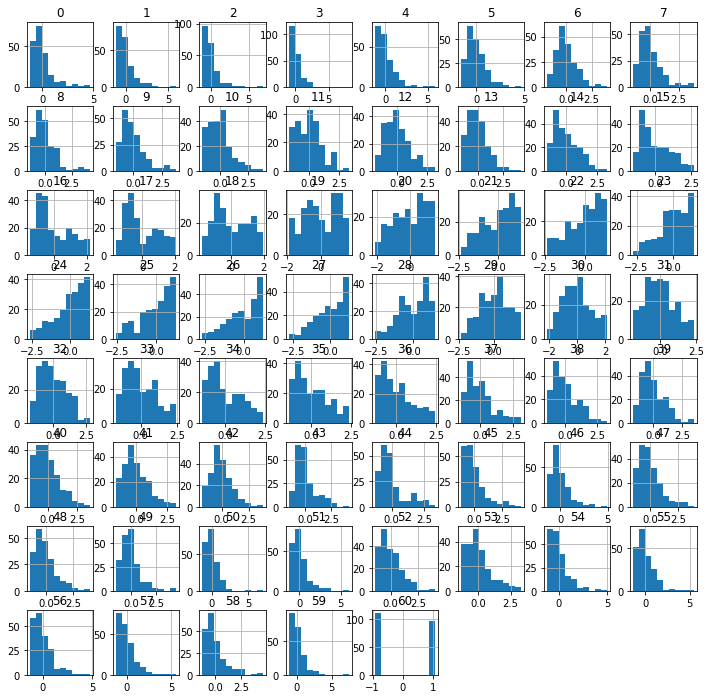

In [18]:
sondata.hist(figsize=(12,12))

In [19]:
sondata.skew(axis = 1, skipna = True)

0      0.326252
1      0.720297
2      0.374341
3      0.942070
4      0.344778
         ...   
203    0.291272
204    0.581753
205    0.356959
206    0.253086
207    0.529698
Length: 208, dtype: float64

In [20]:
#removing outliers
from scipy.stats import zscore
z = np.abs(zscore(sondata))
z

array([[0.39955135, 0.04064823, 0.02692565, ..., 0.17167808, 0.65894689,
        1.06973356],
       [0.70353822, 0.42163039, 1.05561832, ..., 0.44455424, 0.41985233,
        1.06973356],
       [0.12922901, 0.60106749, 1.72340448, ..., 0.25276128, 0.25758223,
        1.06973356],
       ...,
       [1.00438083, 0.16007801, 0.67384349, ..., 0.03913824, 0.67887143,
        0.93481221],
       [0.04953255, 0.09539176, 0.13480381, ..., 0.70402047, 0.34015415,
        0.93481221],
       [0.13794908, 0.06497869, 0.78861924, ..., 0.29860448, 0.99479044,
        0.93481221]])

In [21]:
sondata = sondata[(z<3).all(axis=1)] #removing outliers

In [22]:
sondata.skew(axis = 1, skipna = True)

0      0.326252
1      0.720297
4      0.344778
6      0.037178
7     -0.364022
         ...   
203    0.291272
204    0.581753
205    0.356959
206    0.253086
207    0.529698
Length: 168, dtype: float64

In [23]:
sondata.shape

(168, 61)

In [24]:
x = sondata.iloc[:,0:-1]
y = sondata.iloc[:,-1:]

In [25]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,-0.399551,-0.040648,-0.026926,-0.715105,0.364456,-0.101253,0.521638,0.297843,1.125272,0.021186,-0.567382,-0.658541,-0.352043,-1.414373,-1.240416,-0.651413,-0.402913,-0.584202,0.011612,-0.318092,-0.119597,-0.459029,-0.858165,-0.493225,-0.017695,-0.246629,0.033645,0.481687,0.154486,-0.886521,-1.750890,-0.839777,0.460548,1.523579,1.783805,1.768039,1.276008,1.271024,0.848461,-0.206511,-1.395741,0.030339,0.259328,1.590771,0.442062,-0.164885,-0.200048,0.688588,-0.379978,0.878510,0.595283,-1.115432,-0.597604,0.680897,-0.295646,1.481635,1.763784,0.069870,0.171678,-0.658947
1,0.703538,0.421630,1.055618,0.323330,0.777676,2.607217,1.522625,2.510982,1.318325,0.588706,1.932142,2.898195,2.976719,2.944515,2.079703,2.438336,2.220238,1.667619,1.156279,0.834871,-0.341605,-0.858218,-1.006818,-1.179062,-1.434182,-1.605136,-1.530425,-1.763702,-0.833533,-1.717061,-0.588706,-0.678535,-1.062150,-0.733178,-1.013395,0.126582,0.082283,-1.101179,-0.714012,-0.640777,-0.713840,-1.306977,-0.767653,-0.385613,-0.893356,-1.050261,-0.800670,-0.276618,-0.307489,-1.050756,-0.297902,-0.522349,-0.256857,-0.843151,0.015503,1.901046,1.070732,-0.472406,-0.444554,-0.419852
4,2.050790,0.856537,0.111327,-0.312227,-0.292365,-0.672796,-0.013735,1.317299,1.510531,1.772220,1.353527,1.037528,1.083001,0.712657,0.647036,0.664024,1.196069,0.640022,-1.171910,-0.379537,-0.755295,-0.764199,-0.296406,-0.556527,-1.470607,-1.991772,-0.010833,1.293121,0.351005,-0.492820,0.027284,0.502340,-0.626746,-1.322726,-0.763886,0.126202,0.403590,-0.084520,-0.216518,-0.382686,-0.535163,-0.201359,-0.446000,-0.977475,-0.846418,-0.807026,-1.000109,-1.331760,-0.806549,-1.160790,-0.039129,-1.073812,-0.753780,-0.060532,0.241793,-1.174638,-0.107456,-0.487900,0.447361,0.576375
6,0.110573,1.738516,2.302500,1.872366,1.663662,1.126632,-0.789216,0.062403,0.256533,1.066735,-0.433681,-1.319793,-1.578729,0.479232,1.081813,0.713143,0.376429,-0.100108,-1.175019,-0.533342,0.634687,1.368076,1.170097,-0.489452,-0.608273,-0.072959,-0.533958,-0.638683,-1.770648,-1.662115,0.358935,0.908501,-0.585973,-0.936052,-0.370089,0.498898,1.050800,0.417220,1.118356,1.694948,1.244575,-0.241164,-0.366668,-0.294615,-0.441826,-0.755385,-0.115892,0.213212,-0.034261,-0.331866,0.286425,0.695031,2.000593,0.296453,-0.323932,0.974846,0.239070,0.983994,-0.704020,0.755696
7,0.991301,0.497663,1.053010,-0.473809,0.732564,-0.209795,-0.309002,-0.865232,-0.266742,0.563350,0.333776,0.417783,-0.054083,0.509096,1.182822,0.254701,-0.586533,-1.274122,0.632514,1.439403,0.677066,-0.348948,0.135932,1.026012,0.351467,0.516079,0.755084,-0.358907,-1.441031,-2.137099,-1.745737,-1.770561,-1.544637,-0.011415,-0.100465,-1.062099,-0.719940,0.251071,0.518645,-0.317602,-1.020226,-0.348696,-0.422922,-0.529254,0.114818,0.564072,-0.114739,-1.060346,-0.653207,-0.192489,-0.907272,-0.553564,0.183274,-0.884341,0.397367,0.258351,0.117786,-0.503394,-0.509421,-0.240531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.456232,-0.116681,-0.705146,-0.779738,-0.647842,0.990954,1.314965,0.407323,0.463980,0.448504,0.564920,0.308290,-0.325732,-1.201670,-0.683647,-0.682867,-0.542814,-0.636713,-1.171133,-1.484794,-0.762294,0.249249,0.661229,0.723758,0.885975,0.972436,1.210064,1.293121,0.702319,0.176971,0.466675,0.543708,-0.005920,-1.109882,-1.190178,-1.229851,-1.115201,-0.934560,-0.796592,-1.072800,-0.990935,-1.037850,-0.352245,-0.602955,-0.707588,-0.390159,0.341779,0.720708,0.944343,0.629099,0.353205,-0.189390,-0.129077,1.230104,-0.847228,0.328253,-0.228741,0.550172,1.841992,1.831621
204,0.136733,-0.861801,-0.366036,0.054026,0.014392,-0.148740,-0.369029,-0.388465,-0.635067,0.053253,0.547546,0.660385,0.182721,-0.9530

In [26]:
x.shape

(168, 60)

In [27]:
y.shape

(168, 1)

In [28]:
y

,60
0,1.069734
1,1.069734
4,1.069734
6,1.069734
7,1.069734
...,...
203,-0.934812
204,-0.934812
205,-0.934812
206,-0.934812


In [29]:
#using label encoder 
#giving error Unknown label type: 'continuous' because of 'y' was having float values

y = le.fit_transform(y)


In [30]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### TRAINING MODEL

In [34]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=50)

### APPLYING LOGISTIC REGRESSION

In [35]:
lor = LoR()
lor.fit(train_x,train_y)
pred = lor.predict(test_x)
print('Accuracy Score: ')
print(accuracy_score(test_y,pred))

Accuracy Score: 
0.8529411764705882


In [65]:
def best_model(model):
    i = 0
    max_accu_score = 0 #max accuracy score defining
    for r_state in range(42,101):
        train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=r_state)
        model.fit(train_x,train_y)
        pred_y = model.predict(test_x)
        accu_score = accuracy_score(test_y,pred_y)
        accu_score = round(accu_score*100)
        if accu_score > max_accu_score:
            max_accu_score = accu_score
            final_r_state = r_state
    print("Max Accuracy Score Corresponding to random state ", final_r_state, " is ",max_accu_score)    

In [66]:
lor = LoR()
best_model(lor)

Max Accuracy Score Corresponding to random state  42  is  94.0


### DECISION TREE CLASSIFIER

#### DECISION TREE CLASSIFIER = GINI

In [67]:
dtc = DTC()
best_model(dtc)

Max Accuracy Score Corresponding to random state  42  is  88.0


#### DECISION TREE CLASSIFIER = ENTROPY

In [68]:
dtcen = DTC(criterion='entropy')
best_model(dtcen)

Max Accuracy Score Corresponding to random state  49  is  85.0


### NAIVE BAYES GAUSSIAN NB

In [69]:
gnb = GNB()
best_model(gnb)

Max Accuracy Score Corresponding to random state  42  is  91.0


### SVC

#### SVC POLY

In [70]:
svc = SVC(kernel='poly')
best_model(svc)

Max Accuracy Score Corresponding to random state  63  is  91.0


#### SVC LINEAR

In [71]:
svc = SVC(kernel='linear')
best_model(svc)

Max Accuracy Score Corresponding to random state  42  is  94.0


#### SVC RBF

In [72]:
svc = SVC(kernel='rbf')
best_model(svc)

Max Accuracy Score Corresponding to random state  42  is  94.0


### KNN

In [76]:
for n_neighbors in range(1,11):
    knn= KNN(n_neighbors=n_neighbors)
    print('Accuracy Score with respect to KNN n_neighbors = ', n_neighbors)
    best_model(knn)
    print()

Accuracy Score with respect to KNN n_neighbors =  1
Max Accuracy Score Corresponding to random state  46  is  97.0

Accuracy Score with respect to KNN n_neighbors =  2
Max Accuracy Score Corresponding to random state  44  is  91.0

Accuracy Score with respect to KNN n_neighbors =  3
Max Accuracy Score Corresponding to random state  44  is  100.0

Accuracy Score with respect to KNN n_neighbors =  4
Max Accuracy Score Corresponding to random state  44  is  91.0

Accuracy Score with respect to KNN n_neighbors =  5
Max Accuracy Score Corresponding to random state  44  is  94.0

Accuracy Score with respect to KNN n_neighbors =  6
Max Accuracy Score Corresponding to random state  74  is  91.0

Accuracy Score with respect to KNN n_neighbors =  7
Max Accuracy Score Corresponding to random state  74  is  91.0

Accuracy Score with respect to KNN n_neighbors =  8
Max Accuracy Score Corresponding to random state  74  is  91.0

Accuracy Score with respect to KNN n_neighbors =  9
Max Accuracy Score 

#### FROM THE ABOVE OBSERVATION WE CAN CONCLUDE THAT KNN IS GIVING THE BEST ACCURACY SCORE OF 100.0 ON NEIGHBORS = 3 AT RANDOM STATE 44

In [77]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=44)

knn= KNN(n_neighbors=3)

knn.fit(train_x,train_y)
pred = knn.predict(test_x)
print('Accuracy Score: ')
print(accuracy_score(test_y,pred))
print('Connfusion Matrix: ')
print(confusion_matrix(test_y,pred))
print('Classification Report: ')
print(classification_report(test_y,pred))


Accuracy Score: 
1.0
Connfusion Matrix: 
[[17  0]
 [ 0 17]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        17

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



### SAVING MODEL FOR KNN

In [78]:
from sklearn.externals import joblib

joblib.dump(knn,'sonar_prediction.pkl')

['sonar_prediction.pkl']